# DNA and RNA Data Multi Class Single Label  with IQR boundries
By Brandon Khuu
Last update: 5/10/2021

### Goal
Create a multi-class single label classification neural network with mRNA read data(FPKM).
The classes being classfied are Control(patient is not Autistic), 15q duplication(patient is Autistic), and 16p11 deletion(patient is autisitc)

In [1]:
#Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Import the data

Import the raw RNA data. The indexes are the genes. The header row are the different samples.

In [2]:
#import  raw data data
rna = pd.read_csv('Organoid Files/all_autism_fpkm.csv', header=0, low_memory=False)
rna.head()

,Unnamed: 0,PGP1-1,PGP1-2,PGP1-3,GM23716-1,GM23716-2,GM23716-3,GM23720-1,GM23720-2,GM23720-3,...,14739x3-2,14765x2-1,14765x2-2,14765x2-3,14710x6-1,14781x16-1,14781x16-2,14781x16-3,14746x8-1,14746x8-2
0,CDK5RAP1,5.561823,2.050032,2.481599,4.396121,3.721746,2.260565,3.482430,3.136405,4.645353,...,6.594048,6.941136,7.453001,3.405732,2.784555,6.384259,3.128289,7.880060,3.388043,3.623195
1,TMEM246,9.167399,6.121957,14.205795,15.263531,14.125613,6.008471,5.544019,5.302956,7.467318,...,3.478945,4.855474,4.652040,7.574598,6.334495,7.771520,8.186893,4.857521,3.334954,6.834265
2,PKD1,4.762467,3.086031,8.663784,8.198981,10.278191,5.577455,4.226272,4.628730,7.837992,...,8.564923,6.328464,3.316495,16.091198,9.193670,7.071175,9.025883,7.076191,10.996357,3.154569
3,EDEM1,4.259699,3.888580,2.988719,3.433083,3.331196,3.524835,3.539229,3.586650,3.683216,...,5.435888,6.711067,5.737995,2.197396,2.511982,3.297171,4.009783,4.097137,1.545692,3.818004
4,LSM11,3.333153,3.064389,13.747564,13.873706,13.211928,2.783226,3.232596,3.103675,4.635612,...,2.875419,3.106984,2.572676,2.553229,3.452511,5.224131,4.728078,5.166222,1.109277,3.262106


## Data Preprocessing

### Apply Threshold for FPKM reads
-Get the mean for each gene<br>
-Remove genes that fall below the minimum threshold

In [3]:
#get index col for later
gene_names = rna['Unnamed: 0']

#remove gene name col
rna = rna.drop('Unnamed: 0', axis=1)

#create Mean column
rna['Mean'] = rna.mean(axis=1)

#create genes to drop
genes_to_drop = [i for i in range(rna.shape[0]) if rna.Mean[i] <= 2]

#drop columns
rna = rna.drop(genes_to_drop)
rna = rna.drop('Mean', axis=1)

#adjust gene list
for i in genes_to_drop:
    gene_names = gene_names.drop(i)

#Set Index
rna['Gene Name'] = gene_names
rna = rna.set_index('Gene Name')
rna = rna.T
rna

Gene Name,CDK5RAP1,TMEM246,PKD1,EDEM1,LSM11,COL26A1,CPSF6,DCTN5,MRPS33,COPS8,...,UBE2T,PTK7,EIF2B3,CDK16,C15orf61,GSTP1,IPP,ASB3,EHD4,NRSN2
PGP1-1,5.561823,9.167399,4.762467,4.259699,3.333153,5.245319,15.288924,10.670947,15.418737,26.492518,...,36.320081,23.422699,6.506580,7.639236,1.808342,253.147425,2.624415,5.473228,9.892221,14.017985
PGP1-2,2.050032,6.121957,3.086031,3.888580,3.064389,4.530108,14.225061,11.109630,21.596005,23.446239,...,19.707959,12.679506,6.687741,7.457054,1.614225,290.182382,3.276070,7.483068,7.377414,11.613564
PGP1-3,2.481599,14.205795,8.663784,2.988719,13.747564,6.189141,18.021990,15.850792,9.871680,32.272768,...,15.002978,9.314311,6.744241,36.158595,3.626686,118.126815,2.221963,5.087976,2.392554,15.666102
GM23716-1,4.396121,15.263531,8.198981,3.433083,13.873706,5.018456,17.714552,15.832140,4.594193,30.869273,...,13.609106,9.826147,6.570986,32.786094,3.988325,103.634970,2.459700,4.626596,2.301205,16.500382
GM23716-2,3.721746,14.125613,10.278191,3.331196,13.211928,5.620373,15.806883,15.434513,7.544800,24.221830,...,13.346974,4.147004,5.990253,55.245293,3.849378,111.978695,2.494851,4.843815,2.285043,18.534124
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14781x16-1,6.384259,7.771520,7.071175,3.297171,5.224131,4.838935,16.391965,13.168677,9.170113,23.544437,...,23.827240,11.225659,8.583395,16.807080,2.247722,115.635692,1.998373,4.476631,2.150457,14.543974
14781x16-2,3.128289,8.186893,9.025883,4.009783,4.728078,6.729686,13.232519,10.730565,5.805684,18.649314,...,15.109922,6.428226,6.306627,18.606929,2.320908,93.281158,2.860871,2.771161,2.254990,10.858082
14781x16-3,7.880060,4.857521,7.076191,4.097137,5.166222,5.299588,21.528132,11.529954,13.647595,22.095454,...,24.614361,9.036573,6.284167,25.226473,2.000993,180.321536,3.957021,5.646545,2.751370,12.931406
14746x8-1,3.388043,3.334954,10.996357,1.545692,1.109277,6.404090,4.283906,2.709484,7.187927,9.226015,...,35.300336,11.964774,2.285754,44.006054,2.186490,356.445464,1.027271,1.624070,2.718903,17.184158


# Remove outliers

Find and remove outliers using Interquartile upper bound

In [4]:
#Get description of data frame
rna_description = rna.describe()
rna_description

Gene Name,CDK5RAP1,TMEM246,PKD1,EDEM1,LSM11,COL26A1,CPSF6,DCTN5,MRPS33,COPS8,...,UBE2T,PTK7,EIF2B3,CDK16,C15orf61,GSTP1,IPP,ASB3,EHD4,NRSN2
count,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,...,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000
mean,4.251091,6.086961,6.339876,3.889167,3.776967,6.669858,10.786037,9.214780,14.900356,21.712939,...,18.297158,24.368090,4.830248,26.456523,2.869627,322.669800,2.539877,4.227956,5.871224,13.825605
std,1.552523,2.682573,2.993639,1.714649,2.419474,3.274987,3.707618,2.754342,6.142619,5.574753,...,8.266908,14.571598,1.818987,12.773020,0.785765,117.609148,0.815381,1.348172,2.307261,3.753525
min,1.642499,0.737503,1.373917,1.248757,1.109277,1.080013,3.361271,2.709484,4.326904,9.226015,...,6.120197,0.035749,1.403382,7.450906,1.318897,93.281158,0.819236,1.359497,1.798324,3.886283
25%,3.161636,4.813943,4.110742,3.015643,2.524728,5.057375,8.755803,7.814825,10.026822,19.559559,...,12.532685,12.706315,3.499003,18.610024,2.267118,263.567587,2.007624,3.301800,3.924975,11.386199
50%,4.102123,5.909210,6.178350,3.693254,3.106984,5.753606,10.602403,9.530601,15.258703,22.095454,...,16.674666,23.422699,4.672878,24.529242,2.825838,319.538125,2.577606,4.334588,6.071386,14.017985
75%,5.019582,7.549392,8.110570,4.456003,4.244263,7.551983,12.823286,10.599152,18.642767,24.835660,...,22.618437,29.896202,6.130695,30.623387,3.302059,394.065874,3.054825,5.066565,7.564706,16.364320
max,8.803148,15.263531,16.091198,11.888391,13.873706,17.226045,21.528132,15.850792,30.976296,42.479591,...,54.222988,63.285407,13.099090,69.826664,5.200346,584.605959,4.930689,7.483068,10.173363,22.703151


## Create upper bound
Create an upper bound to filter out outlier genes

In [5]:
#creat IQR
IQR = (rna_description.loc['75%'] - rna_description.loc['25%'])
IQR = IQR*1.5
upper_bound = rna_description.loc['75%'] + IQR
upper_bound

Gene Name
CDK5RAP1      7.806501
TMEM246      11.652564
PKD1         14.110312
EDEM1         6.616542
LSM11         6.823566
               ...    
GSTP1       589.813305
IPP           4.625628
ASB3          7.713712
EHD4         13.024304
NRSN2        23.831500
Length: 11271, dtype: float64

In [6]:
#Apply IQR filter
IQR_drop_list = []
for i in rna.columns:
    temp = rna.get(i)
    for j in range(temp.shape[0]):
        if temp[j] > upper_bound[i]:
            IQR_drop_list.append(j)

            
#create filter list
IQR_drop_list.sort()
IQR_drop_set = set(IQR_drop_list)
col_to_drop = [rna.columns[i] for i in IQR_drop_set]

#drop columns
rna = rna.drop(col_to_drop, axis=1)
rna.head()

Gene Name,HSBP1,CAP1,ZFHX4-AS1,FBXL7,PMPCA,PHF12,MGST3,LOC283070,PPP1R12B,DDX47,...,UBE2T,PTK7,EIF2B3,CDK16,C15orf61,GSTP1,IPP,ASB3,EHD4,NRSN2
PGP1-1,84.510038,25.546087,3.243708,5.533667,16.558363,6.716821,36.765727,3.525942,2.870405,16.862604,...,36.320081,23.422699,6.506580,7.639236,1.808342,253.147425,2.624415,5.473228,9.892221,14.017985
PGP1-2,75.044515,20.451054,3.015391,6.885036,12.673928,5.882669,27.229725,2.658576,2.758019,21.509196,...,19.707959,12.679506,6.687741,7.457054,1.614225,290.182382,3.276070,7.483068,7.377414,11.613564
PGP1-3,100.825429,24.200828,1.594495,1.653018,12.994339,5.947767,46.156174,5.883554,3.761642,13.479399,...,15.002978,9.314311,6.744241,36.158595,3.626686,118.126815,2.221963,5.087976,2.392554,15.666102
GM23716-1,92.587682,22.887937,2.100904,1.835257,11.945566,5.041255,40.480850,6.950511,3.762403,13.463209,...,13.609106,9.826147,6.570986,32.786094,3.988325,103.634970,2.459700,4.626596,2.301205,16.500382
GM23716-2,77.996502,22.323798,1.744930,1.764977,12.519729,6.163550,38.602007,6.977038,3.790913,14.215236,...,13.346974,4.147004,5.990253,55.245293,3.849378,111.978695,2.494851,4.843815,2.285043,18.534124


## Import DNA data

Import the DNA data. The sample's VCF data were merged into a csv file. <br>
The SNPs were filtered to be the same across chromesome/positions.<br>

In [7]:
dna = pd.read_csv('DNA_csv/dna_table_edit_t_mutli_replicates.csv', header=0, index_col=0, low_memory=False)
dna.head()

,chr1@792480,chr1@880238,chr1@887560,chr1@892745,chr1@916549,chr1@1158631,chr1@1246004,chr1@1268847,chr1@1276973,chr1@1296691,...,chrX@149013727,chrX@151303393,chrX@151899760,chrX@152815089,chrX@153174819,chrX@153174867,chrX@153668172,chrX@153994596,chrX@154456747,chrY@21154466
14765x2-1,Homozygous Alternate,Homozygous Alternate,Homozygous Alternate,Homozygous Alternate,Heterozygous Alternate,Homozygous Alternate,Homozygous Alternate,Homozygous Alternate,Homozygous Alternate,Homozygous Alternate,...,Homozygous Alternate,Homozygous Alternate,Homozygous Alternate,Homozygous Alternate,Homozygous Alternate,Homozygous Alternate,Homozygous Alternate,Homozygous Alternate,Homozygous Alternate,Heterozygous Alternate
14765x2-2,Homozygous Alternate,Homozygous Alternate,Homozygous Alternate,Homozygous Alternate,Heterozygous Alternate,Homozygous Alternate,Homozygous Alternate,Homozygous Alternate,Homozygous Alternate,Homozygous Alternate,...,Homozygous Alternate,Homozygous Alternate,Homozygous Alternate,Homozygous Alternate,Homozygous Alternate,Homozygous Alternate,Homozygous Alternate,Homozygous Alternate,Homozygous Alternate,Heterozygous Alternate
14765x2-3,Homozygous Alternate,Homozygous Alternate,Homozygous Alternate,Homozygous Alternate,Heterozygous Alternate,Homozygous Alternate,Homozygous Alternate,Homozygous Alternate,Homozygous Alternate,Homozygous Alternate,...,Homozygous Alternate,Homozygous Alternate,Homozygous Alternate,Homozygous Alternate,Homozygous Alternate,Homozygous Alternate,Homozygous Alternate,Homozygous Alternate,Homozygous Alternate,Heterozygous Alternate
14763x7-1,Homozygous Alternate,Homozygous Alternate,Homozygous Alternate,Homozygous Alternate,Heterozygous Alternate,Heterozygous Alternate,Homozygous Alternate,Homozygous Alternate,Homozygous Alternate,Homozygous Alternate,...,Homozygous Alternate,Homozygous Alternate,Homozygous Alternate,Homozygous Alternate,Homozygous Alternate,Homozygous Alternate,Homozygous Alternate,Homozygous Alternate,Homozygous Alternate,Heterozygous Alternate
14763x7-2,Homozygous Alternate,Homozygous Alternate,Homozygous Alternate,Homozygous Alternate,Heterozygous Alternate,Heterozygous Alternate,Homozygous Alternate,Homozygous Alternate,Homozygous Alternate,Homozygous Alternate,...,Homozygous Alternate,Homozygous Alternate,Homozygous Alternate,Homozygous Alternate,Homozygous Alternate,Homozygous Alternate,Homozygous Alternate,Homozygous Alternate,Homozygous Alternate,Heterozygous Alternate


## Merge the two datasets

Merge the RNA and DNA datasets using the samples as the index

In [8]:
df = rna.merge(dna, how='left', left_index=True, right_index=True)
df

,HSBP1,CAP1,ZFHX4-AS1,FBXL7,PMPCA,PHF12,MGST3,LOC283070,PPP1R12B,DDX47,...,chrX@149013727,chrX@151303393,chrX@151899760,chrX@152815089,chrX@153174819,chrX@153174867,chrX@153668172,chrX@153994596,chrX@154456747,chrY@21154466
1001-1,102.550460,23.146388,2.978928,6.502256,18.052004,6.379909,39.836720,5.605006,2.005778,15.648320,...,Heterozygous Alternate,Homozygous Alternate,Homozygous Alternate,Homozygous Alternate,Homozygous Alternate,Homozygous Alternate,Homozygous Alternate,Homozygous Alternate,Homozygous Alternate,Homozygous Alternate
1001-2,99.298744,20.186967,2.704785,4.963837,19.524286,6.734512,40.460288,4.552715,2.053524,15.457728,...,Heterozygous Alternate,Homozygous Alternate,Homozygous Alternate,Homozygous Alternate,Homozygous Alternate,Homozygous Alternate,Homozygous Alternate,Homozygous Alternate,Homozygous Alternate,Homozygous Alternate
1001-3,55.012568,25.780399,2.024370,4.970446,13.588095,6.069863,23.488103,0.841653,1.476113,20.515583,...,Heterozygous Alternate,Homozygous Alternate,Homozygous Alternate,Homozygous Alternate,Homozygous Alternate,Homozygous Alternate,Homozygous Alternate,Homozygous Alternate,Homozygous Alternate,Homozygous Alternate
1401-1,76.876256,19.628647,4.591231,2.927533,16.389068,5.876370,36.548470,3.520939,2.236157,17.594546,...,Homozygous Alternate,Homozygous Alternate,Homozygous Alternate,Homozygous Alternate,Homozygous Alternate,Homozygous Alternate,Homozygous Alternate,Homozygous Alternate,Homozygous Alternate,Homozygous Alternate
1401-2,72.831719,19.678441,5.252715,2.504651,17.155631,7.704724,26.955107,3.666458,1.824738,14.587359,...,Homozygous Alternate,Homozygous Alternate,Homozygous Alternate,Homozygous Alternate,Homozygous Alternate,Homozygous Alternate,Homozygous Alternate,Homozygous Alternate,Homozygous Alternate,Homozygous Alternate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GM25256-3,86.253169,20.333864,3.210578,6.117640,15.505556,5.855222,33.854155,3.133696,2.480255,17.021145,...,Homozygous Alternate,Homozygous Alternate,Homozygous Alternate,Homozygous Alternate,Homozygous Alternate,Homozygous Alternate,Homozygous Alternate,Homozygous Alternate,Homozygous Alternate,Homozygous Alternate
GM25256-3,86.253169,20.333864,3.210578,6.117640,15.505556,5.855222,33.854155,3.133696,2.480255,17.021145,...,Homozygous Alternate,Homozygous Alternate,Homozygous Alternate,Homozygous Alternate,Homozygous Alternate,Homozygous Alternate,Homozygous Alternate,Homozygous Alternate,Homozygous Alternate,Heterozygous Alternate
PGP1-1,84.510038,25.546087,3.243708,5.533667,16.558363,6.716821,36.765727,3.525942,2.870405,16.862604,...,Homozygous Alternate,Homozygous Alternate,Homozygous Alternate,Homozygous Alternate,Homozygous Alternate,Homozygous Alternate,Homozygous Alternate,Homozygous Alternate,Homozygous Alternate,Heterozygous Alternate
PGP1-2,75.044515,20.451054,3.015391,6.885036,12.673928,5.882669,27.229725,2.658576,2.758019,21.509196,...,Homozygous Alternate,Homozygous Alternate,Homozygous Alternate,Homozygous Alternate,Homozygous Alternate,Homozygous Alternate,Homozygous Alternate,Homozygous Alternate,Homozygous Alternate,Heterozygous Alternate


## Label Encoder

Convert the categorical string VCF data to an encoded factor<br>
Homozygous Reference<br>
Homozygous Alternative<br>
Homozygous Alternative2<br>
Heterozygous Alternative<br>
Heterozygou Alternative2<b2>

In [9]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
cat_features = [i for i in dna.columns]
df[cat_features] = df[cat_features].apply(encoder.fit_transform)
df

,HSBP1,CAP1,ZFHX4-AS1,FBXL7,PMPCA,PHF12,MGST3,LOC283070,PPP1R12B,DDX47,...,chrX@149013727,chrX@151303393,chrX@151899760,chrX@152815089,chrX@153174819,chrX@153174867,chrX@153668172,chrX@153994596,chrX@154456747,chrY@21154466
1001-1,102.550460,23.146388,2.978928,6.502256,18.052004,6.379909,39.836720,5.605006,2.005778,15.648320,...,0,0,0,0,0,0,0,0,0,1
1001-2,99.298744,20.186967,2.704785,4.963837,19.524286,6.734512,40.460288,4.552715,2.053524,15.457728,...,0,0,0,0,0,0,0,0,0,1
1001-3,55.012568,25.780399,2.024370,4.970446,13.588095,6.069863,23.488103,0.841653,1.476113,20.515583,...,0,0,0,0,0,0,0,0,0,1
1401-1,76.876256,19.628647,4.591231,2.927533,16.389068,5.876370,36.548470,3.520939,2.236157,17.594546,...,1,0,0,0,0,0,0,0,0,1
1401-2,72.831719,19.678441,5.252715,2.504651,17.155631,7.704724,26.955107,3.666458,1.824738,14.587359,...,1,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GM25256-3,86.253169,20.333864,3.210578,6.117640,15.505556,5.855222,33.854155,3.133696,2.480255,17.021145,...,1,0,0,0,0,0,0,0,0,1
GM25256-3,86.253169,20.333864,3.210578,6.117640,15.505556,5.855222,33.854155,3.133696,2.480255,17.021145,...,1,0,0,0,0,0,0,0,0,0
PGP1-1,84.510038,25.546087,3.243708,5.533667,16.558363,6.716821,36.765727,3.525942,2.870405,16.862604,...,1,0,0,0,0,0,0,0,0,0
PGP1-2,75.044515,20.451054,3.015391,6.885036,12.673928,5.882669,27.229725,2.658576,2.758019,21.509196,...,1,0,0,0,0,0,0,0,0,0


In [10]:
#drop duplicated samples created from merged bug

df = df.reset_index()
dups = [66,68,70]
df = df.drop(df.index[dups])
df = df.set_index('index')
df.head()

,HSBP1,CAP1,ZFHX4-AS1,FBXL7,PMPCA,PHF12,MGST3,LOC283070,PPP1R12B,DDX47,...,chrX@149013727,chrX@151303393,chrX@151899760,chrX@152815089,chrX@153174819,chrX@153174867,chrX@153668172,chrX@153994596,chrX@154456747,chrY@21154466
index,,,,,,,,,,,,,,,,,,,,,
1001-1,102.550460,23.146388,2.978928,6.502256,18.052004,6.379909,39.836720,5.605006,2.005778,15.648320,...,0,0,0,0,0,0,0,0,0,1
1001-2,99.298744,20.186967,2.704785,4.963837,19.524286,6.734512,40.460288,4.552715,2.053524,15.457728,...,0,0,0,0,0,0,0,0,0,1
1001-3,55.012568,25.780399,2.024370,4.970446,13.588095,6.069863,23.488103,0.841653,1.476113,20.515583,...,0,0,0,0,0,0,0,0,0,1
1401-1,76.876256,19.628647,4.591231,2.927533,16.389068,5.876370,36.548470,3.520939,2.236157,17.594546,...,1,0,0,0,0,0,0,0,0,1
1401-2,72.831719,19.678441,5.252715,2.504651,17.155631,7.704724,26.955107,3.666458,1.824738,14.587359,...,1,0,0,0,0,0,0,0,0,1


In [11]:
#create target column
autism = []
for i in range(71):
    if i > 34:
        autism.append(0.0)
    elif i > 28:
        autism.append(1.0)
    elif i > 5:
        autism.append(2.0)
    else: 
        autism.append(1.0)
autism = np.asarray(autism)
autism

array([1., 1., 1., 1., 1., 1., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 1., 1., 1., 1., 1.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0.])

## Split data set into train and testing 
Import train_test_split and split data into training and testing sets with testing size set to 1/3

In [12]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(df, autism, test_size=.1, random_state=42)

# Model Testing

Test the accuracy and loss of different multi-class classification machine learning models

### Testing 3 different models:
-Decision Tree Classifier<br>
-Multi-Layer Percptron Classifier<br>
-Random Forest Classifier<br>
-K Nearest Neighbors<br>
-Keras Neural Network<br>

Model Accuracy: 87.5
|--- PAGR1 <= 5.16
|   |--- RHBDD1 <= 1.26
|   |   |--- class: 1.0
|   |--- RHBDD1 >  1.26
|   |   |--- class: 2.0
|--- PAGR1 >  5.16
|   |--- chr15@40632302 <= 0.50
|   |   |--- chr14@36840650 <= 0.50
|   |   |   |--- class: 0.0
|   |   |--- chr14@36840650 >  0.50
|   |   |   |--- class: 1.0
|   |--- chr15@40632302 >  0.50
|   |   |--- class: 0.0



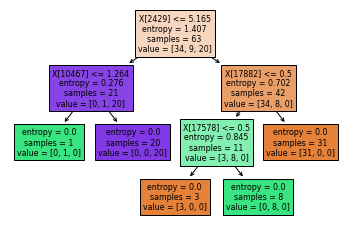

In [13]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.metrics import accuracy_score
from sklearn.tree import export_text

feature_names=[i for i in df.columns]

tree = DecisionTreeClassifier(criterion='entropy',random_state=0)
tree.fit(x_train,y_train)
tree_prediction = tree.predict(x_test)

tree_accuracy = accuracy_score(y_test, tree_prediction)
print('Model Accuracy: {}'.format(tree_accuracy*100))
plot_tree(tree,filled=True)
print(export_text(tree, feature_names=feature_names))

Model Accuracy: 62.5


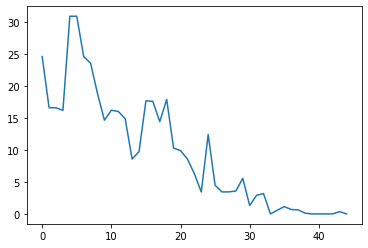

In [14]:
from sklearn.neural_network import MLPClassifier

nn = MLPClassifier(alpha=0.001,max_iter=100000000)
nn.fit(x_train,y_train)
nn_prediction= nn.predict(x_test)

nn_accuracy = accuracy_score(y_test, nn_prediction.round())

print('Model Accuracy: {}'.format(nn_accuracy*100))
plt.plot(nn.loss_curve_)

In [15]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=1)
rf.fit(x_train, y_train)
rf_prediction = rf.predict(x_test)
rf_accuracy = accuracy_score(y_test, rf_prediction.round())
print('Model Accuracy: {}'.format(rf_accuracy*100))

Model Accuracy: 62.5


In [16]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)
knn_prediction = knn.predict(x_test)
knn_accuracy = accuracy_score(y_test, knn_prediction.round())
print('Model Accuracy: {}'.format(knn_accuracy*100))

Model Accuracy: 37.5


import tensorflow as tf

early_stop = tf.keras.callbacks.EarlyStopping(monitor='loss', min_delta = 0.01,
                                              patience=3, verbose=1, restore_best_weights=True)

model = tf.keras.Sequential()

#layer 1 - input
model.add(tf.keras.layers.Dense(512, kernel_initializer=tf.keras.initializers.RandomNormal(),
                                kernel_regularizer=tf.keras.regularizers.l2(0.01),input_shape=[19813]))
model.add(tf.keras.layers.Activation('relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.4))

#layer 2
model.add(tf.keras.layers.Dense(512))
model.add(tf.keras.layers.Activation('relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.5))

#layer 3
model.add(tf.keras.layers.Dense(512,kernel_regularizer=tf.keras.regularizers.l2(0.01)))
model.add(tf.keras.layers.Activation('relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.5))

#layer 4
model.add(tf.keras.layers.Dense(512))
model.add(tf.keras.layers.Activation('relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.5))

#layer 5
model.add(tf.keras.layers.Dense(512,kernel_regularizer=tf.keras.regularizers.l2(0.01)))
model.add(tf.keras.layers.Activation('relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.5))

#layer 6
model.add(tf.keras.layers.Dense(512))
model.add(tf.keras.layers.Activation('relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.5))

#layer 7
model.add(tf.keras.layers.Dense(512,kernel_regularizer=tf.keras.regularizers.l2(0.01)))
model.add(tf.keras.layers.Activation('relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.5))

#layer - output
model.add(tf.keras.layers.Dense(1))
model.add(tf.keras.layers.Activation('softmax'))


opt = tf.keras.optimizers.Adam(learning_rate=0.001)
loss = tf.keras.losses.CategoricalCrossentropy()
model.compile(
    optimizer=opt,
    loss=loss,
    metrics=['accuracy']
)

from sklearn.metrics import confusion_matrix

history = model.fit(x_train, y_train, validation_split=0.1,
                   epochs=500, shuffle=True, callbacks=[early_stop])

pred = model.predict(x_train)

plt.plot(history.history['loss'], label='Categorical Cross Entropy - Training Data')
plt.plot(history.history['val_loss'], label='Categorical Cross Entropy - Test Data')
plt.title('Categorical Cross Entropy - Loss')
plt.ylabel('Categorical Cross Entropy Value')
plt.xlabel('Number of Epoch')
plt.legend(loc='upper left')
plt.show()

plt.plot(history.history['accuracy'], label='Categorical Cross Entropy - Training Data')
plt.plot(history.history['val_accuracy'], label='Categorical Cross Entropy - Test Data')
plt.title('Categorical Cross Entropy - Accuracy')
plt.ylabel('Categorical Cross Entropy Value')
plt.xlabel('Num of Epoch')
plt.legend(loc='upper left')
plt.show()